In [1]:
from pylab import rcParams
#rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
#Если не показывает диаграммы

In [53]:
player_data = pd.read_csv('player_data.csv')
player_data['years_play'] = player_data.year_end - player_data.year_start
player_data.head()


,name,year_start,year_end,position,height,weight,birth_date,college,years_play
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,5


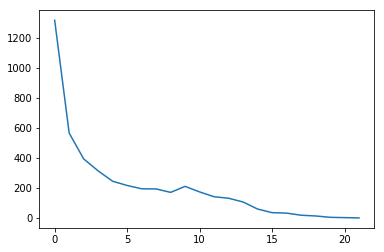

In [106]:
player_data_years_play = player_data.groupby(['years_play']).count().reset_index()
player_data_years_play = player_data_years_play.iloc[:,1:2]
player_data_years_play = player_data_years_play.rename(columns={'name': 'count_players'})
#player_data_years_play.head(10)
#player_data_years_play.plot()
plt.plot(player_data_years_play)
#Смотрим сколько игроков отыграло сколько лет

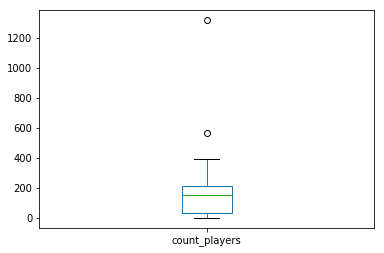

In [62]:
player_data_years_play.plot(kind='box')

In [104]:
player_data['years_birth'] = player_data.birth_date.str[-4:].astype(float)
player_data['year_st_bth'] = player_data.year_start - player_data.years_birth
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,years_play,years_birth,year_st_bth
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4,1968.0,23.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9,1946.0,23.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19,1947.0,23.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10,1969.0,22.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,5,1974.0,24.0


In [140]:
player_data_years_play_bt = player_data.groupby(['years_play','year_st_bth']).count().reset_index()
#
player_data_years_play_bt = player_data_years_play_bt.iloc[:,0:3]

player_data_years_play_bt = player_data_years_play_bt.rename(columns={'name': 'count_players'})
player_data_years_play_bt.head()

,years_play,year_st_bth,count_players
0,0,19.0,1
1,0,20.0,11
2,0,21.0,31
3,0,22.0,53
4,0,23.0,316


In [155]:
player_data_years_play_bt.head()

,years_play,year_st_bth,count_players
0,0,19.0,1
1,0,20.0,11
2,0,21.0,31
3,0,22.0,53
4,0,23.0,316


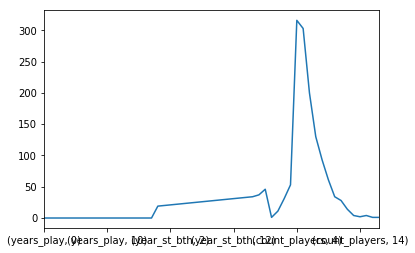

In [145]:
player_data_years_play_bt[player_data_years_play_bt['years_play']==0].unstack().plot()
#.hist(bins=20)
#.unstack().plot()

In [147]:
import seaborn as sns

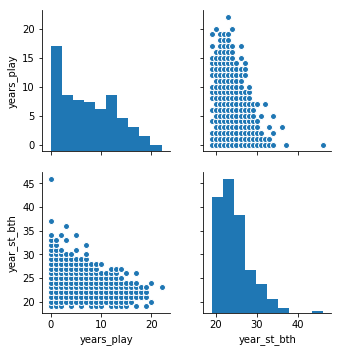

In [169]:
sns_plot = sns.pairplot(
    player_data_years_play_bt[['years_play', 'year_st_bth']])
sns_plot
#зависимость возраста начала карьеры от кол-ва лет в спорте

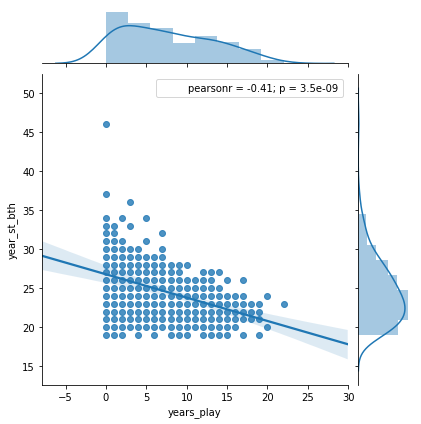

In [152]:
sns.jointplot(x='years_play', y='year_st_bth', 
              data=player_data_years_play_bt, kind='reg'
              #, kind='scatter'
             
             )
#регрессия Очень интересный выброс - начал карьеру в 46 лет

In [163]:
player_data_years_play_bt_pw = player_data_years_play_bt.pivot_table(
                        index='year_st_bth', 
                        columns='years_play', 
                        values='count_players', 
                        aggfunc=sum).fillna(0).applymap(float)
player_data_years_play_bt_pw.head()

years_play,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,22
year_st_bth,,,,,,,,,,,,,,,,,,,,,
19.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
20.0,11.0,13.0,15.0,7.0,5.0,8.0,4.0,2.0,3.0,4.0,...,9.0,9.0,3.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0
21.0,31.0,21.0,21.0,19.0,16.0,10.0,9.0,13.0,10.0,16.0,...,7.0,11.0,3.0,2.0,5.0,2.0,1.0,1.0,0.0,0.0
22.0,53.0,37.0,28.0,29.0,20.0,17.0,23.0,16.0,12.0,26.0,...,16.0,10.0,10.0,8.0,4.0,6.0,5.0,1.0,0.0,0.0
23.0,316.0,169.0,121.0,88.0,94.0,73.0,72.0,78.0,69.0,84.0,...,57.0,42.0,25.0,16.0,12.0,6.0,8.0,2.0,0.0,1.0


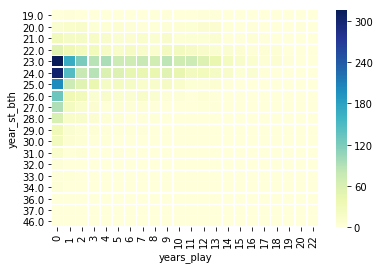

In [168]:
ax = sns.heatmap(player_data_years_play_bt_pw, linewidths=0.5,cmap="YlGnBu")#,cmap="YlGnBu"

#Смотрим как развивалась карьера в зависимости от возраста игрока
#Самый большой шанс проиграть много лет есть и игроков которые начнут карьеру в 23-24 года